In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [11]:
data1 = pd.read_csv('single_layered.csv')
baseline_data = pd.read_csv('baseline.csv')

# Separate data by tile size
layers = data1['Layer'].unique()

baseline_bleu = baseline_data['BLEU Score'][0]

baseline_fscore = baseline_data['Character Fscore'][0]

In [6]:
baseline_fscore

0.2646672440784473

In [5]:
baseline_bleu

41.337328250540224

# Single Matrix Approximation: Tile Size 32 Rank 6

/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_89386/1788445942.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', len(layers))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


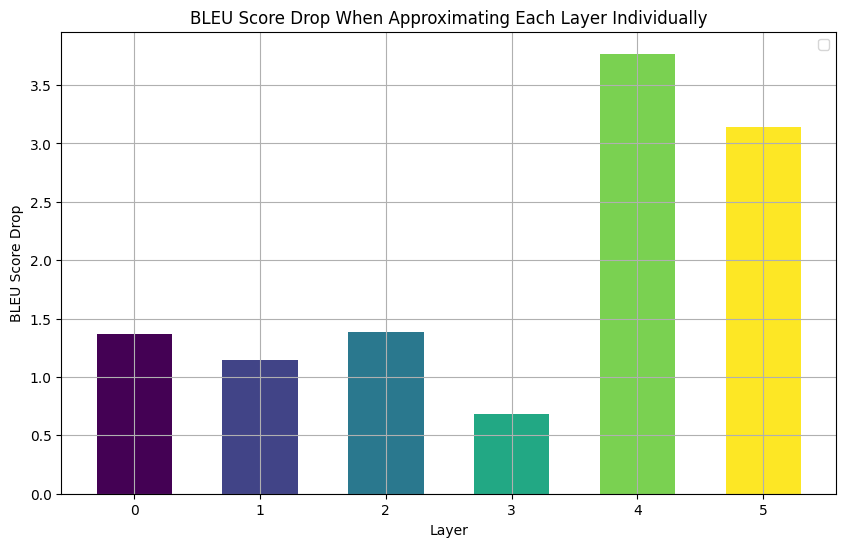

<Figure size 640x480 with 0 Axes>

In [19]:
# Assuming data1 is a DataFrame with 'Layer' and 'BLEU Score' columns
layers = data1['Layer']
bleu_scores = data1['BLEU Score']

# Create the colormap from viridis
viridis = cm.get_cmap('viridis', len(layers))

# Normalize layer data for coloring
norm = plt.Normalize(min(layers), max(layers))
colors = viridis(norm(layers))

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(layers, baseline_bleu-bleu_scores, color=colors, width=0.6)

# Adding labels and title
plt.xlabel('Layer')
plt.ylabel('BLEU Score Drop')
plt.title('BLEU Score Drop When Approximating Each Layer Individually')
plt.grid(True)
plt.legend()

plt.show()
plt.tight_layout()

# Layerwise Approximation Method Comparison

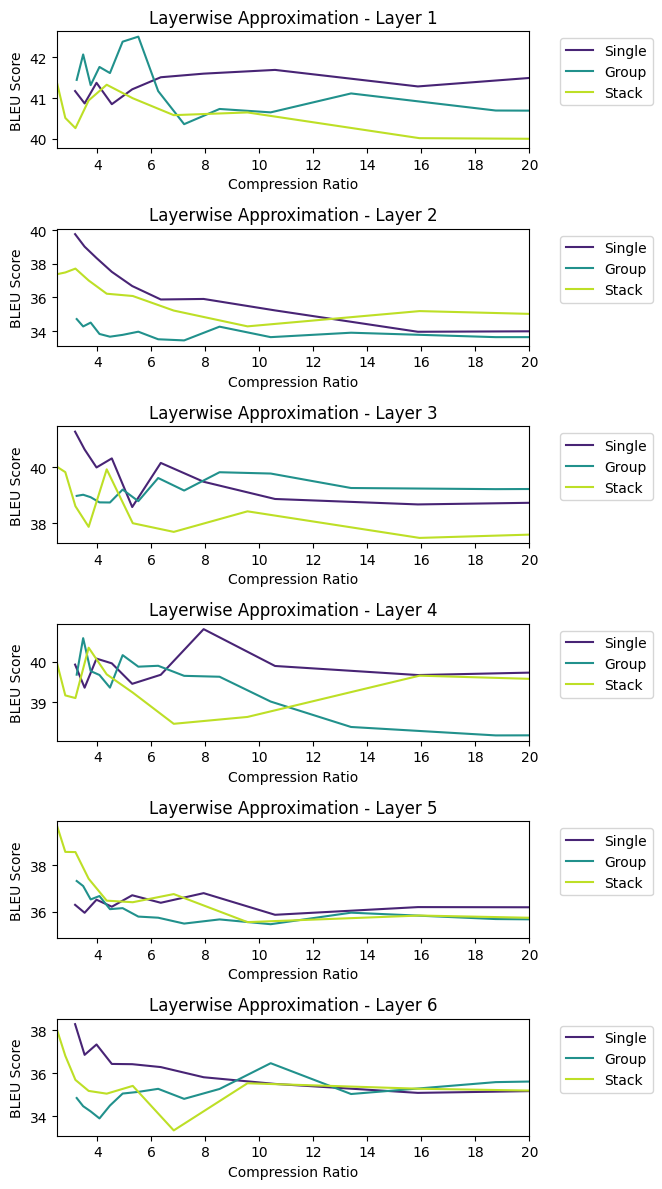

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

single = pd.read_csv('layered_results_single.csv')
group = pd.read_csv('layered_results_group.csv')
stack = pd.read_csv('layered_results_stack.csv')

# Colormap
colormap = plt.get_cmap('viridis')

# Create subplots
fig, axs = plt.subplots(6, 1, figsize=(8, 12))

for i in range(6):
    # Filter for Layer == i
    single_layer = single['Layer'] == i
    group_layer = group['Layer'] == i
    stack_layer = stack['Layer'] == i

    # Plot Single
    axs[i].plot(single['Compression Ratio'][single_layer], single['BLEU Score'][single_layer], 
                color=colormap(0.1), label='Single')
    # Plot Group
    axs[i].plot(group['Compression Ratio'][group_layer], group['BLEU Score'][group_layer], 
                color=colormap(0.5), label='Group')
    # Plot Stack
    axs[i].plot(stack['Compression Ratio'][stack_layer], stack['BLEU Score'][stack_layer], 
                color=colormap(0.9), label='Stack')

    axs[i].set_title(f'Layerwise Approximation - Layer {i+1}')
    axs[i].set_xlabel('Compression Ratio')
    axs[i].set_ylabel('BLEU Score')
    axs[i].set_xlim([2.5,20])
    
    # Add legend outside the plot area
    axs[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout to make space for legends outside the plotting area
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


/var/folders/6l/tkj8jq4d2c1fvr2j6g1kj0n40000gn/T/ipykernel_89386/837294514.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  highest_compression = pd.concat([highest_compression, pd.DataFrame({


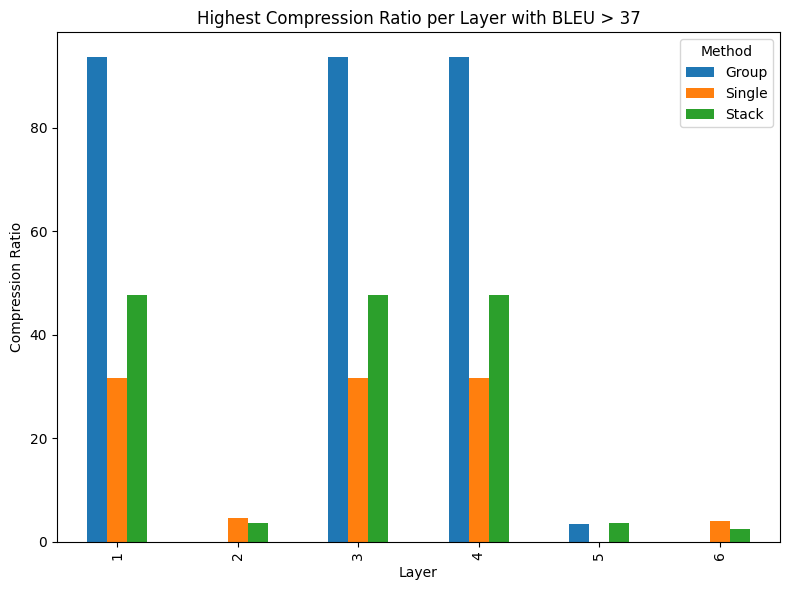

In [42]:
# Threshold for BLEU score
thresholds = [41.2,36,39,]

# Initialize a DataFrame to store the highest compression ratio per layer and method
highest_compression = pd.DataFrame(columns=['Layer', 'Method', 'Compression Ratio'])

# Loop over layers
for i in range(6):
    threshold = thresholds[i]
    # Filter for each layer and threshold condition
    single_layer = single[single['Layer'] == i]
    group_layer = group[group['Layer'] == i]
    stack_layer = stack[stack['Layer'] == i]

    # Filter rows where BLEU score is above threshold
    single_above_threshold = single_layer[single_layer['BLEU Score'] > threshold]
    group_above_threshold = group_layer[group_layer['BLEU Score'] > threshold]
    stack_above_threshold = stack_layer[stack_layer['BLEU Score'] > threshold]

    # Find the highest compression ratio for each method
    if not single_above_threshold.empty:
        single_max = single_above_threshold.loc[single_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Single'], 'Compression Ratio': [single_max['Compression Ratio']]
        })], ignore_index=True)

    if not group_above_threshold.empty:
        group_max = group_above_threshold.loc[group_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Group'], 'Compression Ratio': [group_max['Compression Ratio']]
        })], ignore_index=True)

    if not stack_above_threshold.empty:
        stack_max = stack_above_threshold.loc[stack_above_threshold['Compression Ratio'].idxmax()]
        highest_compression = pd.concat([highest_compression, pd.DataFrame({
            'Layer': [i+1], 'Method': ['Stack'], 'Compression Ratio': [stack_max['Compression Ratio']]
        })], ignore_index=True)

# Reshape the DataFrame for plotting
highest_compression_pivot = highest_compression.pivot(index='Layer', columns='Method', values='Compression Ratio')

# Plot bar plot
fig, ax = plt.subplots(figsize=(8, 6))
highest_compression_pivot.plot(kind="bar", ax=ax)

ax.set_xlabel('Layer')
ax.set_ylabel('Compression Ratio')
plt.title('Highest Compression Ratio per Layer with BLEU > 37')
plt.tight_layout()
plt.show()
